<a href="https://colab.research.google.com/github/mandresblanco/tests_/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example loads the data, trains a classifier on 70% of the total data, tests that classifier on the remaining 30% of the data, and calculates the accuracy of the classifier:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/OA 5.4 - wine.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0,1


Mark about 70% of the data for training and use the rest for testing
We will use ‘density’, ‘sulfates’, and ‘residual_sugar’ features for training a classifier on ‘high_quality’



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['density','sulfates','residual_sugar']], df['high_quality'], test_size=.3)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Test the classifier by giving it test instances
prediction = classifier.predict(X_test)
# prediction
# Count how many were correctly classified
correct = np.where(prediction==y_test, 1, 0).sum()
print (correct)

1509


In [ ]:
# Calculate the accuracy of this classifier
accuracy = correct/len(y_test)
print (accuracy)

0.7738461538461539


In [ ]:
# Start with an array where the results (k and corresponding
# accuracy) will be stored
results = []
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction==y_test, 1, 0).sum()/(len(y_test))
    print ('k=',k,'Accuracy=', accuracy)
    results.append([k, accuracy]) # Storing the k,accuracy
    # tuple in results


k= 1 Accuracy= 0.7764102564102564
k= 3 Accuracy= 0.7738461538461539
k= 5 Accuracy= 0.7764102564102564
k= 7 Accuracy= 0.7933333333333333
k= 9 Accuracy= 0.7964102564102564
k= 11 Accuracy= 0.7984615384615384
k= 13 Accuracy= 0.803076923076923
k= 15 Accuracy= 0.7943589743589744
k= 17 Accuracy= 0.7938461538461539
k= 19 Accuracy= 0.7984615384615384
k= 21 Accuracy= 0.8
k= 23 Accuracy= 0.7979487179487179
k= 25 Accuracy= 0.796923076923077
k= 27 Accuracy= 0.796923076923077
k= 29 Accuracy= 0.798974358974359
k= 31 Accuracy= 0.7994871794871795
k= 33 Accuracy= 0.7994871794871795
k= 35 Accuracy= 0.8
k= 37 Accuracy= 0.8005128205128205
k= 39 Accuracy= 0.8005128205128205
k= 41 Accuracy= 0.801025641025641
k= 43 Accuracy= 0.8025641025641026
k= 45 Accuracy= 0.8020512820512821
k= 47 Accuracy= 0.8020512820512821
k= 49 Accuracy= 0.8020512820512821


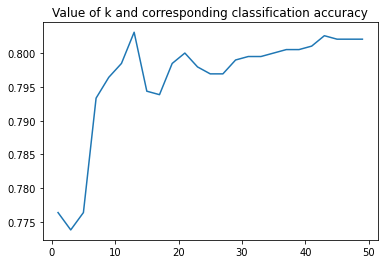

In [ ]:
# Convert that series of tuples in a dataframe for easy plotting
results = pd.DataFrame(results, columns=['k', 'accuracy'])
plt.plot(results.k, results.accuracy)
plt.title('Value of k and corresponding classification accuracy')
plt.show()